# Reading the dataframe

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../data/cancelamentos.csv')
df.head()

,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
df.drop('CustomerID', axis=1, inplace=True)

Translating do columns to english

In [4]:
df.columns

Index(['idade', 'sexo', 'tempo_como_cliente', 'frequencia_uso',
       'ligacoes_callcenter', 'dias_atraso', 'assinatura', 'duracao_contrato',
       'total_gasto', 'meses_ultima_interacao', 'cancelou'],
      dtype='object')

In [5]:
df.rename(
    columns={'idade':'age', 'sexo':'gender', 'tempo_como_cliente':'time_as_client', 'frequencia_uso':'use_frequency', 
             'ligacoes_callcenter':'callcenter_calls', 'dias_atraso':'days_of_delay', 'assinatura':'plan', 
             'duracao_contrato':'contract_duration', 'total_gasto':'total_spent', 'meses_ultima_interacao':'last_interaction_monthly', 
             'cancelou':'canceled'},
    inplace=True,
)
df.head()


,age,gender,time_as_client,use_frequency,callcenter_calls,days_of_delay,plan,contract_duration,total_spent,last_interaction_monthly,canceled
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881666 entries, 0 to 881665
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       881664 non-null  float64
 1   gender                    881664 non-null  object 
 2   time_as_client            881663 non-null  float64
 3   use_frequency             881663 non-null  float64
 4   callcenter_calls          881664 non-null  float64
 5   days_of_delay             881664 non-null  float64
 6   plan                      881661 non-null  object 
 7   contract_duration         881663 non-null  object 
 8   total_spent               881664 non-null  float64
 9   last_interaction_monthly  881664 non-null  float64
 10  canceled                  881664 non-null  float64
dtypes: float64(8), object(3)
memory usage: 74.0+ MB


In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881659 entries, 0 to 881665
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       881659 non-null  float64
 1   gender                    881659 non-null  object 
 2   time_as_client            881659 non-null  float64
 3   use_frequency             881659 non-null  float64
 4   callcenter_calls          881659 non-null  float64
 5   days_of_delay             881659 non-null  float64
 6   plan                      881659 non-null  object 
 7   contract_duration         881659 non-null  object 
 8   total_spent               881659 non-null  float64
 9   last_interaction_monthly  881659 non-null  float64
 10  canceled                  881659 non-null  float64
dtypes: float64(8), object(3)
memory usage: 80.7+ MB


# Basic statistics

In [9]:
df_people_canceled = df[df['canceled'] == 1]

In [10]:
total_people_canceled = len(df_people_canceled) 
percentage_people_canceled = (total_people_canceled / len(df))*100

print(f'Total of people canceled: {total_people_canceled}\nPercentage of people canceled: {round(percentage_people_canceled,2)}%')

Total of people canceled: 499993
Percentage of people canceled: 56.71%


c:\Users\pedro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


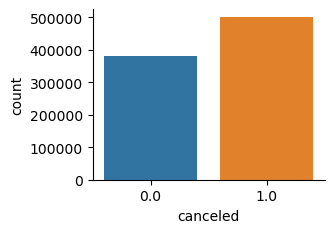

In [11]:
sns.catplot(data=df, x="canceled", y=None, kind="count").figure.set_size_inches(3, 2)

Age

In [12]:
mean_age_canceled = df_people_canceled['age'].mean()
mean_age = df['age'].mean()

print(f'Average age who canceled: {round(mean_age_canceled)}\nAverage age: {round(mean_age)}')

Average age who canceled: 42
Average age: 39


c:\Users\pedro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


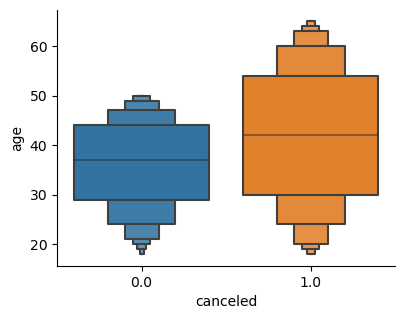

In [13]:
sns.catplot(data=df, x="canceled", y="age", kind="boxen").figure.set_size_inches(4, 3)

Gender

In [14]:
per_men_total = len((df[df['gender'].str.contains('Male')])) / len(df)*100
per_women_total = len((df[df['gender'].str.contains('Female')])) / len(df)*100

print(f'{round(per_men_total,2)}% men and {round(per_women_total,2)}% women')

56.77% men and 43.23% women


In [15]:
per_men_canceled = len((df_people_canceled[df_people_canceled['gender'].str.contains('Male')])) / len(df_people_canceled)*100
per_women_canceled = len((df_people_canceled[df_people_canceled['gender'].str.contains('Female')])) / len(df_people_canceled)*100

print(f'WHO CANCELED ARE: {round(per_men_canceled,2)}% men and {round(per_women_canceled,2)}% women')

WHO CANCELED ARE: 49.18% men and 50.82% women


Time as client

c:\Users\pedro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


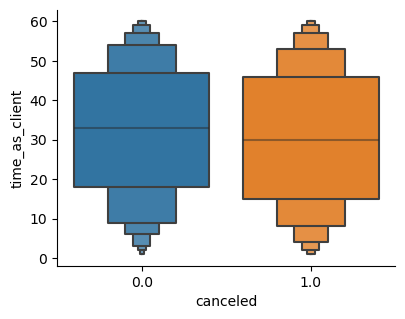

In [16]:
sns.catplot(data=df, x="canceled", y="time_as_client", kind="boxen").figure.set_size_inches(4, 3)

Callcenter calls

c:\Users\pedro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


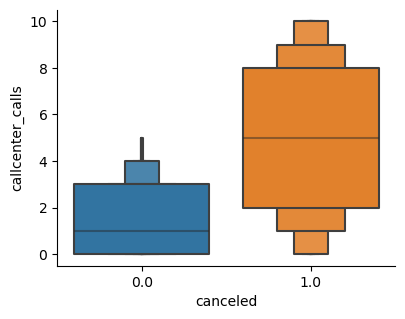

In [17]:
sns.catplot(data=df, x="canceled", y="callcenter_calls", kind="boxen").figure.set_size_inches(4, 3)

c:\Users\pedro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


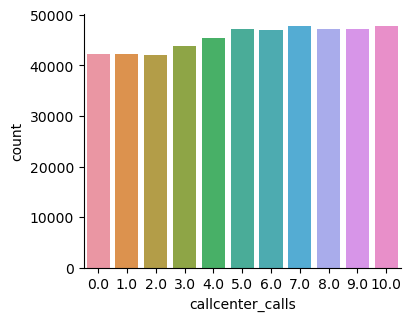

In [18]:
sns.catplot(data=df_people_canceled, x="callcenter_calls", y=None, kind="count").figure.set_size_inches(4, 3)

c:\Users\pedro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


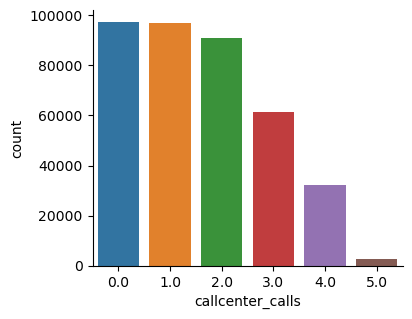

In [19]:
sns.catplot(data=df[df['canceled']==0], x="callcenter_calls", y=None, kind="count").figure.set_size_inches(4, 3)

Plan

In [20]:
df['plan'].unique()

array(['Standard', 'Basic', 'Premium'], dtype=object)

In [21]:
standard = len(df[df['plan'].str.contains('Standard')])
basic = len(df[df['plan'].str.contains('Basic')])
premium = len(df[df['plan'].str.contains('Premium')])

In [22]:
standard_canceled = len(df_people_canceled[df_people_canceled['plan'].str.contains('Standard')])
basic_canceled = len(df_people_canceled[df_people_canceled['plan'].str.contains('Basic')])
premium_canceled = len(df_people_canceled[df_people_canceled['plan'].str.contains('Premium')])

In [23]:
print(f'Standard cancellation fee: {round(standard_canceled / standard *100,2)}%')
print(f'Basic cancellation fee: {round(basic_canceled / basic *100,2)}%')
print(f'Premium cancellation fee: {round(premium_canceled / premium *100,2)}%')

Standard cancellation fee: 56.07%
Basic cancellation fee: 58.18%
Premium cancellation fee: 55.94%


Contract duration

In [24]:
df['contract_duration'].unique()

array(['Annual', 'Monthly', 'Quarterly'], dtype=object)

In [25]:
annual = len(df[df['contract_duration'].str.contains('Annual')])
monthly = len(df[df['contract_duration'].str.contains('Monthly')])
quarterly = len(df[df['contract_duration'].str.contains('Quarterly')])

In [26]:
annual_canceled = len(df_people_canceled[df_people_canceled['contract_duration'].str.contains('Annual')])
monthly_canceled = len(df_people_canceled[df_people_canceled['contract_duration'].str.contains('Monthly')])
quarterly_canceled = len(df_people_canceled[df_people_canceled['contract_duration'].str.contains('Quarterly')])

In [27]:
print(f'Annual cancellation fee: {round(annual_canceled / annual *100,2)}%')
print(f'Monthly cancellation fee: {round(monthly_canceled / monthly *100,2)}%')
print(f'Quarterly cancellation fee: {round(quarterly_canceled / quarterly *100,2)}%')

Annual cancellation fee: 46.08%
Monthly cancellation fee: 100.0%
Quarterly cancellation fee: 46.03%


In [28]:
print(f'{monthly}')
print(f'{monthly_canceled}')

174205
174205


In [29]:
percentage_people_canceled_without_monthly = ((total_people_canceled - monthly) / (len(df) - monthly))*100

In [30]:
print(f'Cancellation fee: {round(percentage_people_canceled,2)}%')
print(f'Cancellation fee without monthly: {round(percentage_people_canceled_without_monthly,2)}%')

Cancellation fee: 56.71%
Cancellation fee without monthly: 46.05%


c:\Users\pedro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


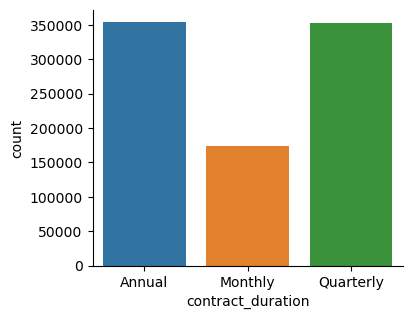

In [31]:
sns.catplot(data=df, x="contract_duration", y=None, kind="count").figure.set_size_inches(4, 3)

c:\Users\pedro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


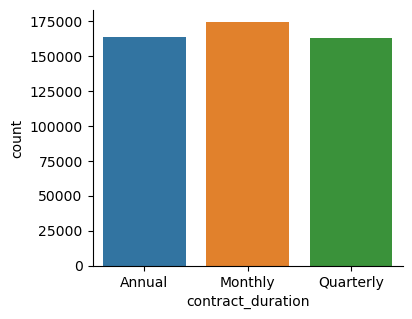

In [32]:
sns.catplot(data=df_people_canceled, x="contract_duration", y=None, kind="count").figure.set_size_inches(4, 3)

Last interaction

c:\Users\pedro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


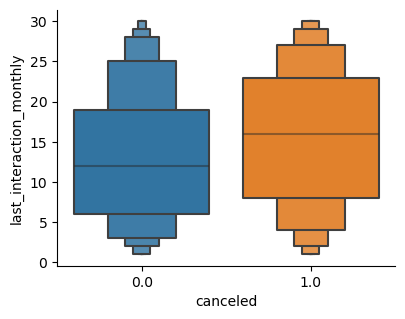

In [33]:
sns.catplot(data=df, x="canceled", y="last_interaction_monthly", kind="boxen").figure.set_size_inches(4, 3)

Days of delay

c:\Users\pedro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


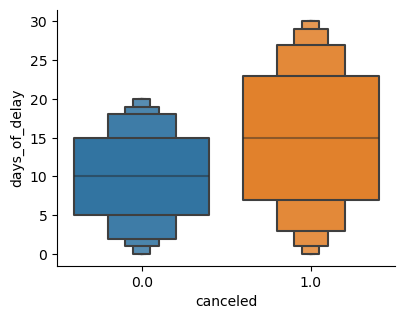

In [34]:
sns.catplot(data=df, x="canceled", y="days_of_delay", kind="boxen").figure.set_size_inches(4, 3)

c:\Users\pedro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


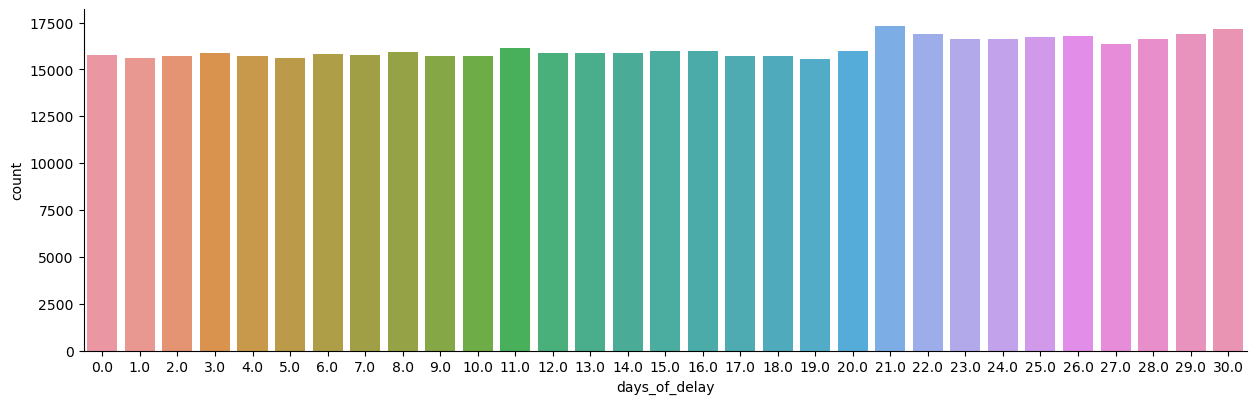

In [35]:
sns.catplot(data=df_people_canceled, x="days_of_delay", y=None, kind="count").figure.set_size_inches(15, 4)

c:\Users\pedro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


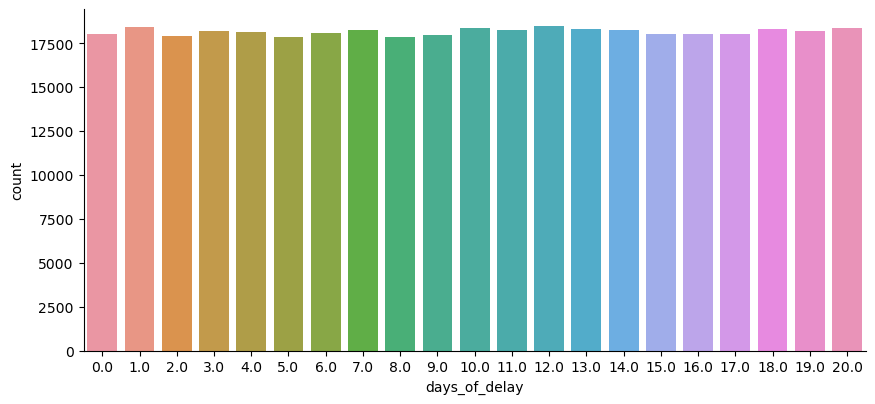

In [36]:
sns.catplot(data=df[df['canceled']==0], x="days_of_delay", y=None, kind="count").figure.set_size_inches(10, 4)

Total spent

c:\Users\pedro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


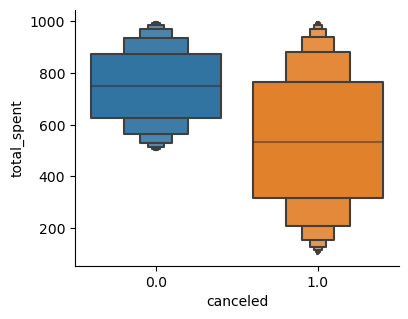

In [37]:
sns.catplot(data=df, x="canceled", y="total_spent", kind="boxen").figure.set_size_inches(4, 3)

Saving to make the predict model

In [38]:
df.to_csv('../data/cancaled_db.csv', index=False)